In [29]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay


In [30]:
df=pd.read_csv('/content/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [31]:
df.head

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [32]:
df.tail

<bound method NDFrame.tail of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [33]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [34]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
#seperate input and output
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [36]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [37]:
#print training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
788,62,0,0,138,294,1,1,106,0,1.9,1,3,2
679,68,1,2,180,274,1,0,150,1,1.6,1,0,3
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2
366,58,1,2,112,230,0,0,165,0,2.5,1,1,3
345,66,1,1,160,246,0,1,120,1,0.0,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,64,1,0,120,246,0,0,96,1,2.2,0,1,2
767,68,1,0,144,193,1,1,141,0,3.4,1,2,3
72,56,1,0,125,249,1,0,144,1,1.2,1,1,2
908,62,1,0,120,267,0,1,99,1,1.8,1,2,3


In [38]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,60,1,0,117,230,1,1,160,1,1.4,2,2,3
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2
119,42,1,1,120,295,0,1,162,0,0.0,2,0,2
629,65,1,3,138,282,1,0,174,0,1.4,1,1,2
186,40,1,0,110,167,0,0,114,1,2.0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,58,0,0,100,248,0,0,122,0,1.0,1,0,2
185,57,1,0,165,289,1,0,124,0,1.0,1,3,3
286,64,0,2,140,313,0,1,133,0,0.2,2,0,3
1001,42,1,0,140,226,0,1,178,0,0.0,2,0,2


In [39]:
# normalisation : standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
x_train


array([[ 0.84287068, -1.49322796, -0.92148277, ..., -0.61823273,
         2.20430609, -0.52060454],
       [ 1.51262126,  0.66969011,  1.08368611, ..., -0.61823273,
        -0.72071698,  1.10232353],
       [ 1.28937106, -1.49322796,  1.08368611, ..., -0.61823273,
         0.25429071, -0.52060454],
       ...,
       [ 0.17312009,  0.66969011, -0.92148277, ..., -0.61823273,
         0.25429071, -0.52060454],
       [ 0.84287068,  0.66969011, -0.92148277, ..., -0.61823273,
         1.2292984 ,  1.10232353],
       [ 1.06612087,  0.66969011,  2.08627055, ..., -0.61823273,
        -0.72071698,  1.10232353]])

In [40]:
x_test

array([[ 0.60110488,  0.64252941, -0.90819261, ...,  1.0285458 ,
         1.16419905,  1.06174283],
       [-0.36484453, -1.556349  ,  0.91410917, ...,  1.0285458 ,
        -0.75844603, -0.52571732],
       [-1.33079395,  0.64252941,  0.00295828, ...,  1.0285458 ,
        -0.75844603, -0.52571732],
       ...,
       [ 1.03041574, -1.556349  ,  0.91410917, ...,  1.0285458 ,
        -0.75844603,  1.06174283],
       [-1.33079395,  0.64252941, -0.90819261, ...,  1.0285458 ,
        -0.75844603, -0.52571732],
       [-0.36484453,  0.64252941,  0.91410917, ...,  1.0285458 ,
         0.20287651,  1.06174283]])

In [41]:
# implement model using KNN, Naive bayes,SVM
svm=SVC()
knn=KNeighborsClassifier()
nav=GaussianNB()
lst=[svm,knn,nav]


SVC()
Accuracy score 0.8993506493506493
classification report               precision    recall  f1-score   support

           0       0.98      0.83      0.90       161
           1       0.84      0.98      0.90       147

    accuracy                           0.90       308
   macro avg       0.91      0.90      0.90       308
weighted avg       0.91      0.90      0.90       308

KNeighborsClassifier()
Accuracy score 0.8344155844155844
classification report               precision    recall  f1-score   support

           0       0.88      0.79      0.83       161
           1       0.79      0.88      0.84       147

    accuracy                           0.83       308
   macro avg       0.84      0.84      0.83       308
weighted avg       0.84      0.83      0.83       308

GaussianNB()
Accuracy score 0.7922077922077922
classification report               precision    recall  f1-score   support

           0       0.87      0.71      0.78       161
           1       0.73    

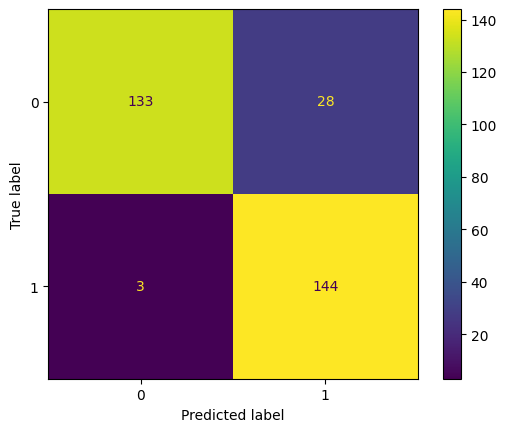

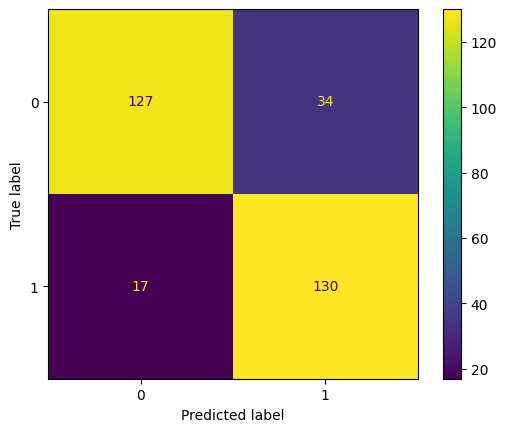

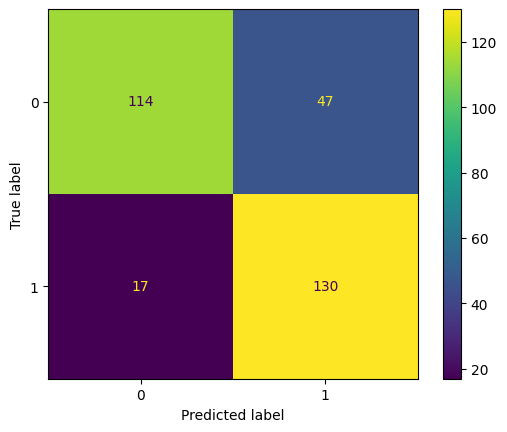

In [42]:
for i in lst:
  print(i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print("Accuracy score",accuracy_score(y_test,y_pred))
  print("classification report",classification_report(y_test,y_pred))
  result=confusion_matrix(y_test,y_pred)
  labels=[0,1]
  cmd=ConfusionMatrixDisplay(result,display_labels=labels)
  cmd.plot()
